# Incremental Linear Regression
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 6.0)

## Leyendo los datos

In [2]:
df = pd.read_csv("../../Recursos/regLin.csv")

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[["X"]],df[[df.columns[1]]], train_size=0.75)

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

## Funciones de ayuda

In [6]:
def calcError(X,Y,W):
    return np.mean((np.transpose(Y)[0] - X.dot(W))**2)

In [7]:
def addX0(X):
    ones = np.ones((len(X),1))
    X = np.append(ones, X, axis=1)
    return X

## Función SGD

In [8]:
def SGD(X,Y,eta,iters):
    errors = []
    X = addX0(X)
    W = np.random.rand(len(X[0]))*100
    W = np.ones(len(X[0]))
    for j in range (0, iters):
        for i in range(0, len(X)):
            W = W+eta*(Y[i][0]-(X[i].dot(W)))*X[i]
            errors.append(calcError(X,Y,W))
    return W, errors
    

## Entrenando el modelo

In [9]:
W_final, errors = SGD(X_train,Y_train,0.05,3)

/Users/karlosss/Documents/ITAM/Machine-Learning/VirtualEnvs/clase-1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/Users/karlosss/Documents/ITAM/Machine-Learning/VirtualEnvs/clase-1/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


## Entrenando el modelo con datos estandarizados ($\eta$ = 0.05, 3 iteraciones)

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [11]:
W_final, errors = SGD(X_train,Y_train,.05,3)

## Gráfica del error cuadrático para cada W encontrada

In [12]:
steps = []
for i in range (0, len(errors)):
    steps.append(i+1)

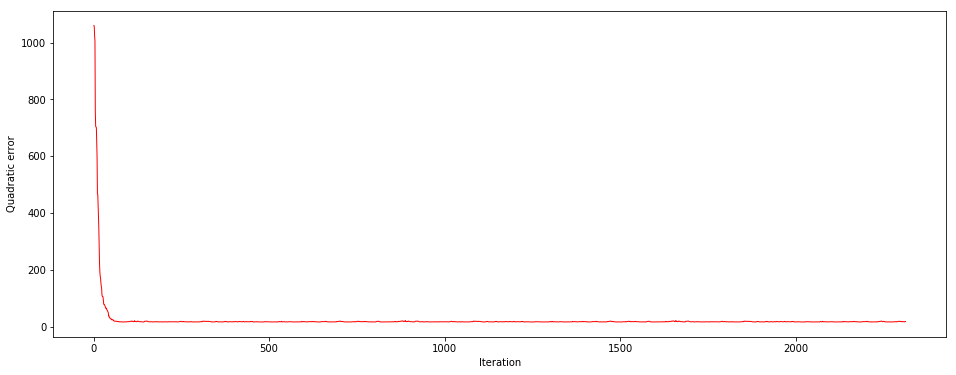

In [13]:
plt.plot(steps, errors, color='red', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Quadratic error')

## Comparando los resultados con los obtenidos con SciKit Learn

In [15]:
linReg = LinearRegression()
linReg.fit(X_train,Y_train)
print linReg.intercept_,linReg.coef_
print W_final

[ 32.81295851] [[ 17.58432166]]
[ 32.54883128  18.7505136 ]


## Predicciones con el set de test

In [16]:
X_test =scaler.transform(X_test)
X_test_ones = addX0(X_test)

In [17]:
predictions = []
for i in range (0, len(X_test)):
    predictions.append(X_test_ones[i].dot(W_final))

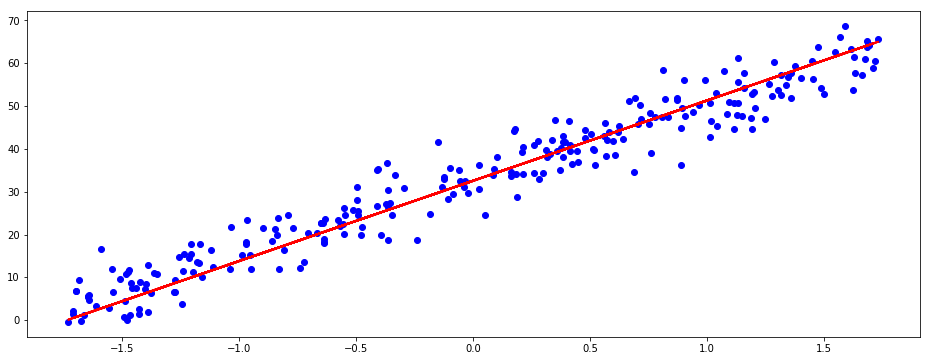

In [18]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, predictions, color='red', linewidth=2)

## Entrenando el modelo con datos estandarizados ($\eta$ = 0.1, 3 iteraciones)

In [19]:
W_final_2, errors_2 = SGD(X_train,Y_train,.1,3)

## Gráfica del error cuadrático para cada W encontrada

In [20]:
steps_2 = []
for i in range (0, len(errors_2)):
    steps_2.append(i+1)

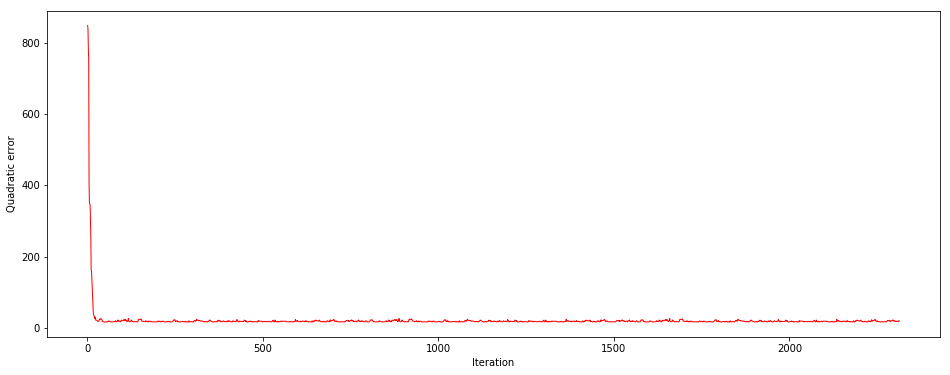

In [21]:
plt.plot(steps_2, errors_2, color='red', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Quadratic error')

## Comparando los resultados con los obtenidos con SciKit Learn

In [22]:
print linReg.intercept_,linReg.coef_
print W_final_2

[ 32.81295851] [[ 17.58432166]]
[ 31.71252631  19.08902791]


## Predicciones con el set de test

In [23]:
predictions_2 = []
for i in range (0, len(X_test)):
    predictions_2.append(X_test_ones[i].dot(W_final_2))

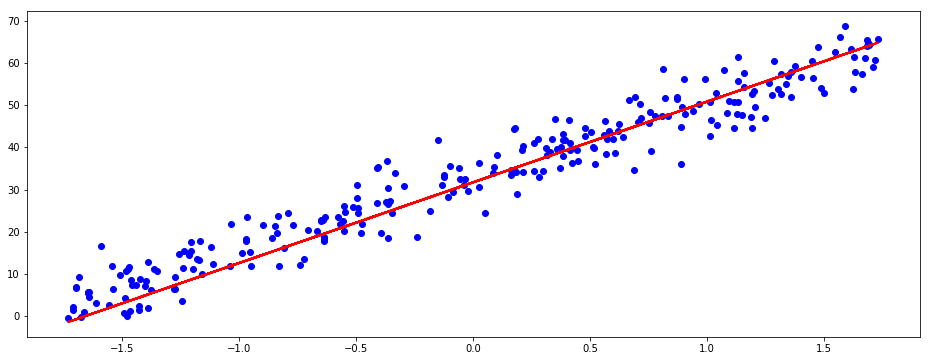

In [24]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, predictions_2, color='red', linewidth=2)

## Entrenando el modelo con datos estandarizados ($\eta$ = 1, 3 iteraciones)

In [25]:
W_final_3, errors_3 = SGD(X_train,Y_train,1,3)

## Gráfica del error cuadrático para cada W encontrada

In [26]:
steps_3 = []
for i in range (0, len(errors_3)):
    steps_3.append(i+1)

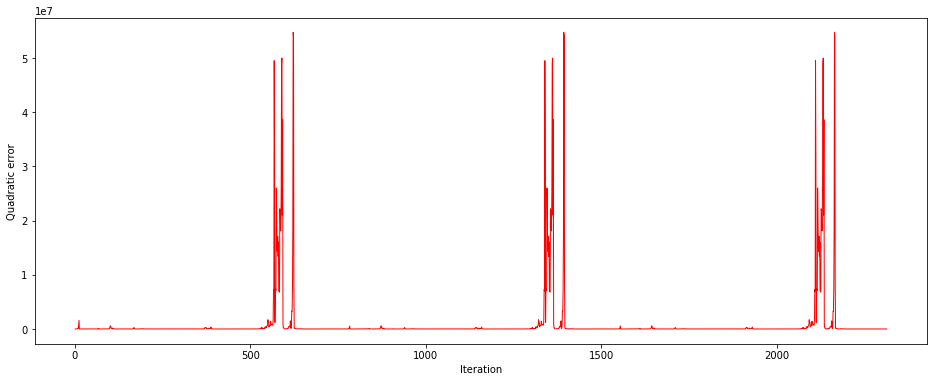

In [27]:
plt.plot(steps_3, errors_3, color='red', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Quadratic error')

## Comparando los resultados con los obtenidos con SciKit Learn

In [28]:
print linReg.intercept_,linReg.coef_
print W_final_3

[ 32.81295851] [[ 17.58432166]]
[ 38.10965725   3.04435292]


## Predicciones con el set de test

In [29]:
predictions_3 = []
for i in range (0, len(X_test)):
    predictions_3.append(X_test_ones[i].dot(W_final_3))

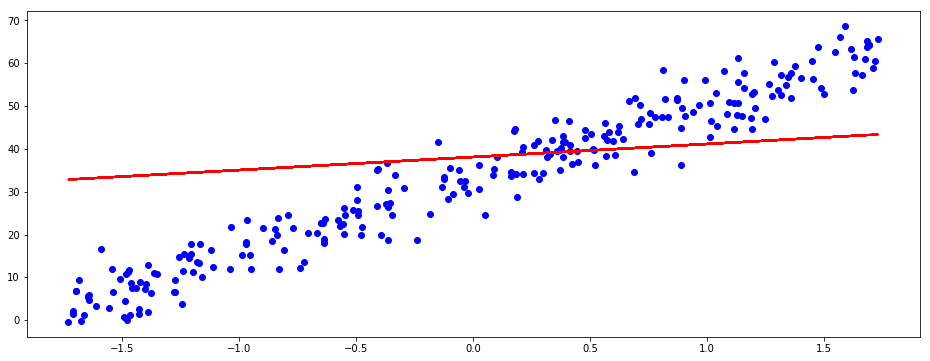

In [30]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, predictions_3, color='red', linewidth=2)

## Conclusiones

El primer detalle que encontramos es que se necesita estandarizar los datos previamente a entrenar nuestro modelo ya que, de no hacerlo, el error crece demasiado y nos lleva a errores de overflow, lo cual interrumpe la ejecución de la rutina.

Respecto al valor de $\eta$, en el caso de valores pequeños tales como 0.05 o 0.1 podemos ver que cumplen con el objetivo de reducir el error cuadrático medio, aunque para el caso de 0.1 encontramos que converge más rápido aunque presenta unas pequeñas variaciones mientras que para 0.05 la curva de error se ve más estable aunque tarda un poco más en converger, esto se debe a que al dar pasos mas pequeños, se necesitan más iteraciones para llegar al mínimo pero, una vez llegando a su vecindad, tiene menos probabilidad de alejarse.

Por otra parte cuando el valor de $\eta$ es elevado (por ejemplo 1) podemos ver que la regresión falla ya que el error cuadrático falla en converger (esto debe suceder porque los saltos son tan grandes que empiezan a alejarse del mínimo al que estaba acercándose.

Como observación adicional para $\eta=1$ al iterar el procedimiento, pude notar que el error se vuelve cíclico y que la divergencia encontrada, se repite periódicamente.